### 230528 하은서 필수과제2 
- 주가 예측해 보기 !
- 하나의 기업말고 두 개 이상으로 비교해 주세요, ex) 경쟁사, 동종기업, 보완재 등등 다양한 비교가능한 기업들의 주가를 비교 예측해 보는 것
- 실제 금융데이터를 기반으로 주가를 예측하고, 실제 값과 예측한 값이 얼마나 차이나는지를 확인해 보기 
- 투자했을 때 얻을 수 있는 수익까지 간단하게 계산해 보면서 시계열데이터 예측을 진행해 보자!

In [1]:
pip install finance-datareader

Note: you may need to restart the kernel to use updated packages.


In [18]:
import FinanceDataReader as fdr
import numpy as np 
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
kr = fdr.StockListing('KRX')
kr

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72300,1,700,0.98,71700,72400,71500,6119502,441472382200,431615278365000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,564000,1,1000,0.18,562000,565000,559000,73932,41564239000,131976000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,113000,2,-600,-0.53,113100,113600,111200,2306681,258706220500,82264267245000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,758000,1,11000,1.47,747000,759000,740000,23937,17971214000,53949892000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,707000,2,-2000,-0.28,709000,712000,702000,76354,53865767000,49908786501000,70592343,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1597,2,-1,-0.06,1597,1597,1597,1,1597,2523196120,1579960,KNX
2723,288490,KR7288490006,나라소프트,KONEX,일반기업부,49,2,-2,-3.92,51,51,49,34264,1714159,1869203000,38147000,KNX
2724,322190,KR7322190000,베른,KONEX,일반기업부,165,5,-29,-14.95,165,165,165,130,21450,1472657505,8925197,KNX
2725,000547,KR7000542001,흥국화재2우B,KOSPI,,9170,2,-1330,-12.67,10010,10940,9000,23791,233447510,1408512000,153600,STK


In [4]:
kr.query('Name=="하이브"')

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
24,352820,KR7352820005,하이브,KOSPI,,299500,2,-1500,-0.5,299000,303500,296000,74253,22283587500,12473897064000,41649072,STK


In [5]:
x = fdr.DataReader('352820')
x

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2023-06-20,299500,303500,298000,300500,221852,0.000000
2023-06-21,300500,303500,294500,296500,233629,-0.013311
2023-06-22,295000,312500,291000,307000,560667,0.035413


In [6]:
dic = { 'ds' : x.index,
       'y' : x.Close}

In [7]:
from pandas import DataFrame
import pandas as pd

In [8]:
df = pd.DataFrame(dic)
df

,ds,y
Date,,
2020-10-15,2020-10-15,255420
2020-10-16,2020-10-16,198495
2020-10-19,2020-10-19,187110
2020-10-20,2020-10-20,180675
2020-10-21,2020-10-21,177210
...,...,...
2023-06-20,2023-06-20,300500
2023-06-21,2023-06-21,296500
2023-06-22,2023-06-22,307000


In [9]:
df.reset_index(inplace=True)

del df['Date']

In [10]:
df

,ds,y
0,2020-10-15,255420
1,2020-10-16,198495
2,2020-10-19,187110
3,2020-10-20,180675
4,2020-10-21,177210
...,...,...
662,2023-06-20,300500
663,2023-06-21,296500
664,2023-06-22,307000
665,2023-06-23,301000


<Axes: xlabel='ds'>

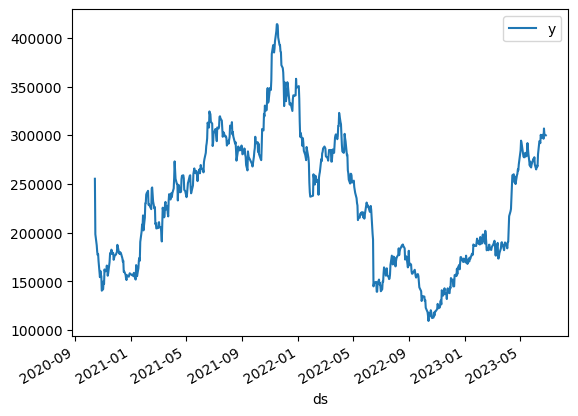

In [11]:
df.plot('ds')

In [13]:
test = df[666:]
test

,ds,y
666,2023-06-26,300000


# 예측하기

In [14]:
prophet = Prophet(daily_seasonality=True)

# 데이터 학습
prophet.fit(df)

13:22:45 - cmdstanpy - INFO - Chain [1] start processing
13:22:45 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# 향후 30일치 예측값
future =prophet.make_future_dataframe( periods=20)
forecast = prophet.predict(future)

In [16]:
#실제예측한 값
ph_yhat=forecast[['ds','yhat']][662:] 
ph_yhat

,ds,yhat
662,2023-06-20,280782.924036
663,2023-06-21,280240.073985
664,2023-06-22,281603.028561
665,2023-06-23,281450.299501
666,2023-06-26,281400.478165
667,2023-06-27,282397.024190
668,2023-06-28,281810.215219
669,2023-06-29,283156.123360
670,2023-06-30,283016.656162
671,2023-07-01,297237.017871


          ds           yhat     yhat_lower     yhat_upper
0 2020-10-15  135546.848461  107244.955841  164046.608560
1 2020-10-16  136315.291956  109661.093631  164142.667905
2 2020-10-19  139157.959974  113998.280445  167130.277771
3 2020-10-20  141170.166381  115278.735017  170467.574241
4 2020-10-21  141628.829983  114932.329195  169525.741644


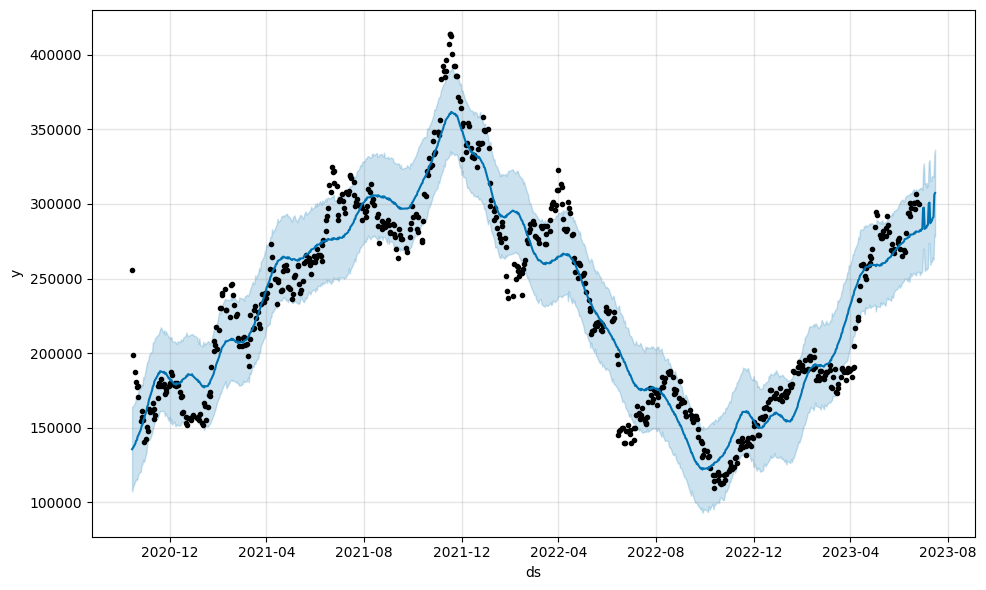

In [19]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

prophet.plot(forecast)
plt.show()